## Projeto 1

### Grupo: Enrique Laborão Monteiro (elm2), Giovanny Lira de Araujo Cunha (glac2) e Leônidas Dantas de Castro Netto (ldcn)

In [ ]:
#!pip install roboticstoolbox-python

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#import roboticstoolbox as rtb



In [ ]:
def rectify_angle(theta):
  return theta % (2*math.pi)


In [ ]:
def SE2_generic(x,y,theta):
    return np.matrix([[math.cos(theta),-math.sin(theta), x], [math.sin(theta),math.cos(theta), y],[0,0,1]])

In [ ]:
def SE2_xy(x,y):
  return SE2_generic(x,y,0)

In [ ]:
def SE2_theta(theta):
  return SE2_generic(0,0,theta)

In [ ]:
SE2_theta(math.pi/2)

matrix([[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
        [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
        [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [ ]:
SE2_xy(1,2)

matrix([[ 1., -0.,  1.],
        [ 0.,  1.,  2.],
        [ 0.,  0.,  1.]])

In [ ]:
def transform(input,x,y,theta, rotate_first=False):
    #add new column filled with ones
    a = np.concatenate((input,np.array([1])),axis=None)

    #generate transform matrix starting with translation or rotation
    transform_matrix = np.matmul(SE2_xy(x,y), SE2_theta(theta))
    if rotate_first:
      transform_matrix = np.matmul(SE2_theta(theta), SE2_xy(x,y))

    #get the transformed matrix and extract the final coords
    output = np.array(np.matmul(transform_matrix,a)[0])[0]

    return output[:-1]

In [ ]:
#P em referencia a R1
transform([0.5,0.5],1,0.25,0)

array([1.5 , 0.75])

In [ ]:
#P em referencia a R2
transform([0.5,0.5],-1,-0.25,0)

array([-0.5 ,  0.25])

In [ ]:
#P em referencia a R1
transform([0.5,0.5],1,0.25,math.pi/4)

array([1.        , 0.95710678])

In [ ]:
#P em referencia a R1
transform([0.5,0.5],1,0.25,math.pi/4)

array([1.        , 0.95710678])

In [ ]:
#P em referencia a R2
transform([0.5,0.5],-1,-0.25,-math.pi/4, rotate_first=True)

array([-0.1767767 ,  0.53033009])

# Exercicio 2

In [ ]:
def fk(theta1, theta2):
  theta_out = theta1+theta2
  point_arm_2_1 = transform([0.0,0.0],1,0,theta2, rotate_first=True)
  point_arm_2_0 = transform(point_arm_2_1,1,0,theta1, rotate_first=True)

  return (point_arm_2_0[0],point_arm_2_0[1], theta_out)

In [ ]:
fk(0,0)

(2.0, 0.0, 0)

In [ ]:
fk(math.pi,math.pi)

(0.0, -1.2246467991473532e-16, 6.283185307179586)

In [ ]:
fk(math.pi,0)

(-2.0, 2.4492935982947064e-16, 3.141592653589793)

In [ ]:
fk(0,math.pi/2)

(1.0, 1.0, 1.5707963267948966)

In [ ]:
fk(math.pi/2,math.pi/2)

(-0.9999999999999999, 1.0000000000000002, 3.141592653589793)

In [ ]:
fk(0,math.pi/2)

(1.0, 1.0, 1.5707963267948966)

In [ ]:
fk(math.pi/2,-math.pi/2)

(1.0, 1.0, 0.0)

In [ ]:
fk(-math.pi,math.pi)

(0.0, -1.2246467991473532e-16, 0.0)

In [ ]:
def ik(x, y):

  #check if coordinates are within the arm's reach
  #factor added at the end to compensate for float arithmetic errors
  if(x**2 + y**2 > 2**2 + 0.00000001):
    return ()

  if x==0 and y==0:
    return (math.pi, -math.pi) , (-math.pi, math.pi)


  q2 = math.acos((x**2+y**2-1-1)/2)

  q1_offset = math.atan2(math.sin(q2), (1+math.cos(q2)))
  q1_offset_alt = math.atan2(math.sin(-q2), (1+math.cos(-q2)))

  q1 = math.atan2(y,x)-q1_offset
  q1_alt = math.atan2(y,x)-q1_offset_alt


  return (q1,q2),(q1_alt,-q2)

In [ ]:
ik(0,0)

((3.141592653589793, -3.141592653589793),
 (-3.141592653589793, 3.141592653589793))

In [ ]:
ik(1,1)

((0.0, 1.5707963267948966), (1.5707963267948966, -1.5707963267948966))

In [ ]:
ik(1,-1)

((-1.5707963267948966, 1.5707963267948966), (0.0, -1.5707963267948966))

In [ ]:
ik(-1,1)

((1.5707963267948966, 1.5707963267948966),
 (3.141592653589793, -1.5707963267948966))

In [ ]:
ik(-1,-1)

((-3.141592653589793, 1.5707963267948966),
 (-1.5707963267948966, -1.5707963267948966))

In [ ]:
ik(2,1)

()

In [ ]:
ik(2,0)

((0.0, 0.0), (0.0, -0.0))

In [ ]:
ik(0,2)

((1.5707963267948966, 0.0), (1.5707963267948966, -0.0))

In [ ]:
ik(-2,0)

((3.141592653589793, 0.0), (3.141592653589793, -0.0))

# Exercicio 3

In [ ]:
def get_angle_complement(theta):
  comp = np.sign(theta)*(2*math.pi-abs(theta))

  return comp

In [ ]:
def get_deloc_vector(delta,a,v_max,ts):
  if delta==0:
    return np.array([0])

  if delta<0:
    a=-a
    v_max=-v_max
  #time for acceleration
  t_acc = v_max/a

  #deloc for the acceleration and inertia periods
  deloc_acc = a*t_acc**2/2 #ds = a*t**2/2
  deloc_inertia = (delta-2*deloc_acc) #delocation for acceleration and deacceleration is the same

  #compensate for trajectories with no inertia periods
  if deloc_acc*2>delta:
    t_acc=math.sqrt(delta/a) #ds/2 = a*t**2/2
    v_max = t_acc*a
    deloc_acc = a*t_acc**2/2
    deloc_inertia=0

  t_inertia = deloc_inertia/v_max
  t_total = t_inertia + 2*t_acc

  sample_array = np.arange(0, t_total+ts, ts)
  vel_array = [] #for debugging
  deloc_array = []


  for t in sample_array:
    vel_sample = None
    deloc_sample = None

    if t<t_acc: #acceleration period
      vel_sample = t*a
      deloc_sample = a*t**2/2
    elif t<(t_total-t_acc): #constant vel period
      vel_sample = v_max
      deloc_sample = deloc_acc+v_max*(t-t_acc)
    elif t<t_total: #deacceleration period
      delta_t = (t-t_acc-t_inertia)
      vel_sample = v_max-a*delta_t
      deloc_sample = deloc_acc+deloc_inertia+ v_max*delta_t - a*delta_t**2/2
    else: #compensation for overshooting the sampling period
      vel_sample = 0
      deloc_sample = delta


    vel_array.append(vel_sample)
    deloc_array.append(deloc_sample)

  return np.array(deloc_array)

In [ ]:
def get_joint_traj_vector(init, final ,a,v_max,ts):

  delta = final - init

  if abs(delta)>math.pi:
    delta = -get_angle_complement(delta)

  deloc_vector = get_deloc_vector(delta, a, v_max,ts)
  traj_vector = deloc_vector + init
  return traj_vector

In [ ]:
def make_arrays_equal_size(arr1, arr2):
    len1 = len(arr1)
    len2 = len(arr2)

    if len1 < len2:
        # Replicate last element of arr1 to match the size of arr2
        arr1 = np.pad(arr1, (0, len2 - len1), mode='edge')
    elif len1 > len2:
        # Replicate last element of arr2 to match the size of arr1
        arr2 = np.pad(arr2, (0, len1 - len2), mode='edge')

    return arr1, arr2

def calculate_trajectory_time(delta, a, v_max):
  if delta==0:
    return 0

  #delta being positive or negative doesnt affect the time
  #being negative would throw an error while calculating the square root
  if delta<0:
    delta=-delta

  #time for acceleration
  t_acc = v_max/a

  #deloc for the acceleration and inertia periods
  deloc_acc = a*t_acc**2/2 #ds = a*t**2/2
  deloc_inertia = (delta-2*deloc_acc) #delocation for acceleration and deacceleration is the same

  #compensate for trajectories with no inertia periods
  if deloc_acc*2>delta:
    t_acc=math.sqrt(delta/a) #ds/2 = a*t**2/2
    v_max = t_acc*a
    deloc_acc = a*t_acc**2/2
    deloc_inertia=0

  t_inertia = deloc_inertia/v_max
  t_total = t_inertia + 2*t_acc

  return t_total

def get_ajusted_accelerations(t1_init,t2_init, t1_final,t2_final, a, v_max, ts):
    delta1 = t1_final - t1_init
    delta2 = t2_final - t2_init
    time1 = calculate_trajectory_time(delta1, a, v_max)
    time2 = calculate_trajectory_time(delta2, a, v_max)

    if time1 < time2: # traj 2 is longer than 1
        a_ajusted = v_max**2/(v_max*time2 - abs(delta1))
        if time2<=2*v_max/a_ajusted: #has no inertia period
          a_ajusted = 4*abs(delta1)/time2**2

        return a_ajusted,a
    elif time2 < time1:  #traj 1 is longer than 2
        a_ajusted = v_max**2/(v_max*time1 - abs(delta2))
        if time1<=2*v_max/a_ajusted: #has no inertia period
          a_ajusted = 4*abs(delta2)/time1**2

        return a, a_ajusted

    return a,a

In [ ]:
def traj_joint(theta1_init,theta2_init, theta1_final,theta2_final, ts = 0.1):
    a = 1.0
    v_max = 0.91

    #if one trajectory is bigger than the other, ajust the acceleration of the smallest one as to finish simultaneously
    a_1, a_2 = get_ajusted_accelerations(theta1_init,theta2_init, theta1_final,theta2_final, a, v_max, ts)
    traj_theta1 = get_joint_traj_vector(theta1_init, theta1_final, a_1,v_max, ts)
    traj_theta2 = get_joint_traj_vector(theta2_init, theta2_final, a_2,v_max, ts)


    #if one of the trajectories is null (delta=0), fill the array with the initial position
    traj_theta1, traj_theta2 = make_arrays_equal_size(traj_theta1, traj_theta2)


    return  traj_theta1, traj_theta2

In [ ]:
def plot_trajs(traj_1, traj_2):
  r = np.full(traj_1.shape, 1)

  fig, ax = plt.subplots(2,2, figsize=(10, 8))

  ax[0,0].plot(traj_1)
  ax[0,0].set_title("Trajectory 1")

  ax[0,1].plot(traj_2)
  ax[0,1].set_title("Trajectory 2")

  ax[1,0]= plt.subplot(2, 2, 3, projection='polar')
  ax[1,0].plot(traj_1, r)
  ax[1,0].set_title("Trajectory 1 polar")

  ax[1,1]= plt.subplot(2, 2, 4, projection='polar')
  ax[1,1].plot(traj_2, r)
  ax[1,1].set_title("Trajectory 2 polar")



In [ ]:
def get_fk_from_traj(traj_1, traj_2):
  x_array = []
  y_array = []
  for (t1,t2) in zip(traj_1, traj_2):
    coords = fk(t1,t2)
    x_array.append(coords[0])
    y_array.append(coords[1])

  return x_array, y_array

def plot_trajs(traj_1, traj_2):
  r = np.full(traj_1.shape, 1)
  fig = plt.figure(figsize=(10, 12))
  gs = fig.add_gridspec(3, 2)

  ax = fig.add_subplot(gs[0, 0])
  ax.plot(traj_1)
  ax.grid(True)
  ax.set_title("Trajectory 1")

  ax = fig.add_subplot(gs[0, 1])
  ax.plot(traj_2)
  ax.grid(True)
  ax.set_title("Trajectory 2")

  ax = fig.add_subplot(gs[1, 0], projection='polar')
  ax.plot(traj_1, r)
  ax.set_title("Trajectory 1 polar")

  ax = fig.add_subplot(gs[1, 1], projection='polar')
  ax.plot(traj_2, r)
  ax.set_title("Trajectory 2 polar")

  ax = fig.add_subplot(gs[2, :])
  euclidian_traj = get_fk_from_traj(traj_1,traj_2)
  ax.set_xlim([-2.5, 2.5])
  ax.set_ylim([-2.5, 2.5])
  ax.plot(euclidian_traj[0], euclidian_traj[1], )
  ax.grid(True)
  ax.set_title("Robot Trajectory")
  fig.tight_layout()
  fig.show()


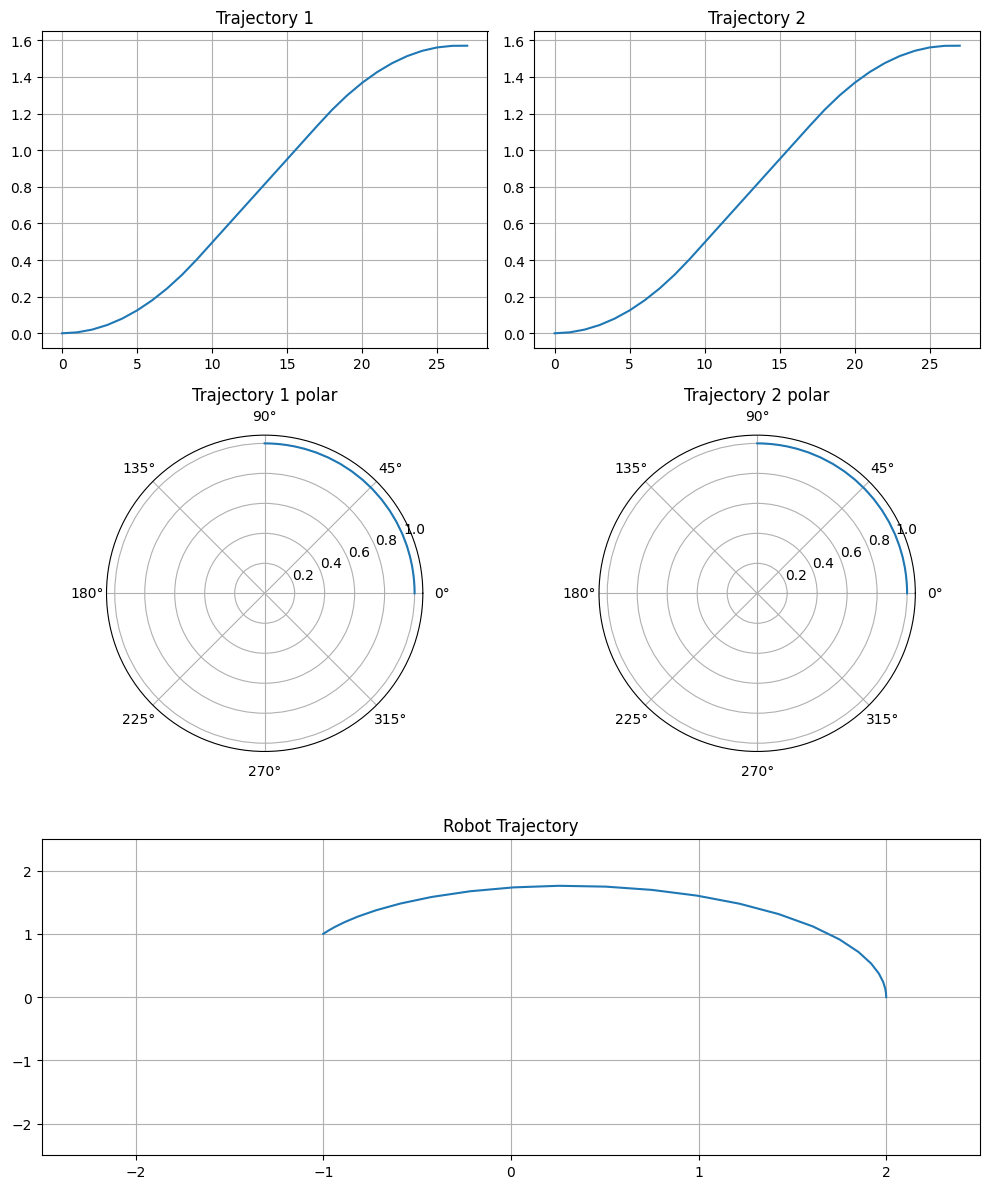

In [ ]:
trajs = traj_joint(0,0,math.pi/2,math.pi/2)
plot_trajs(trajs[0], trajs[1])

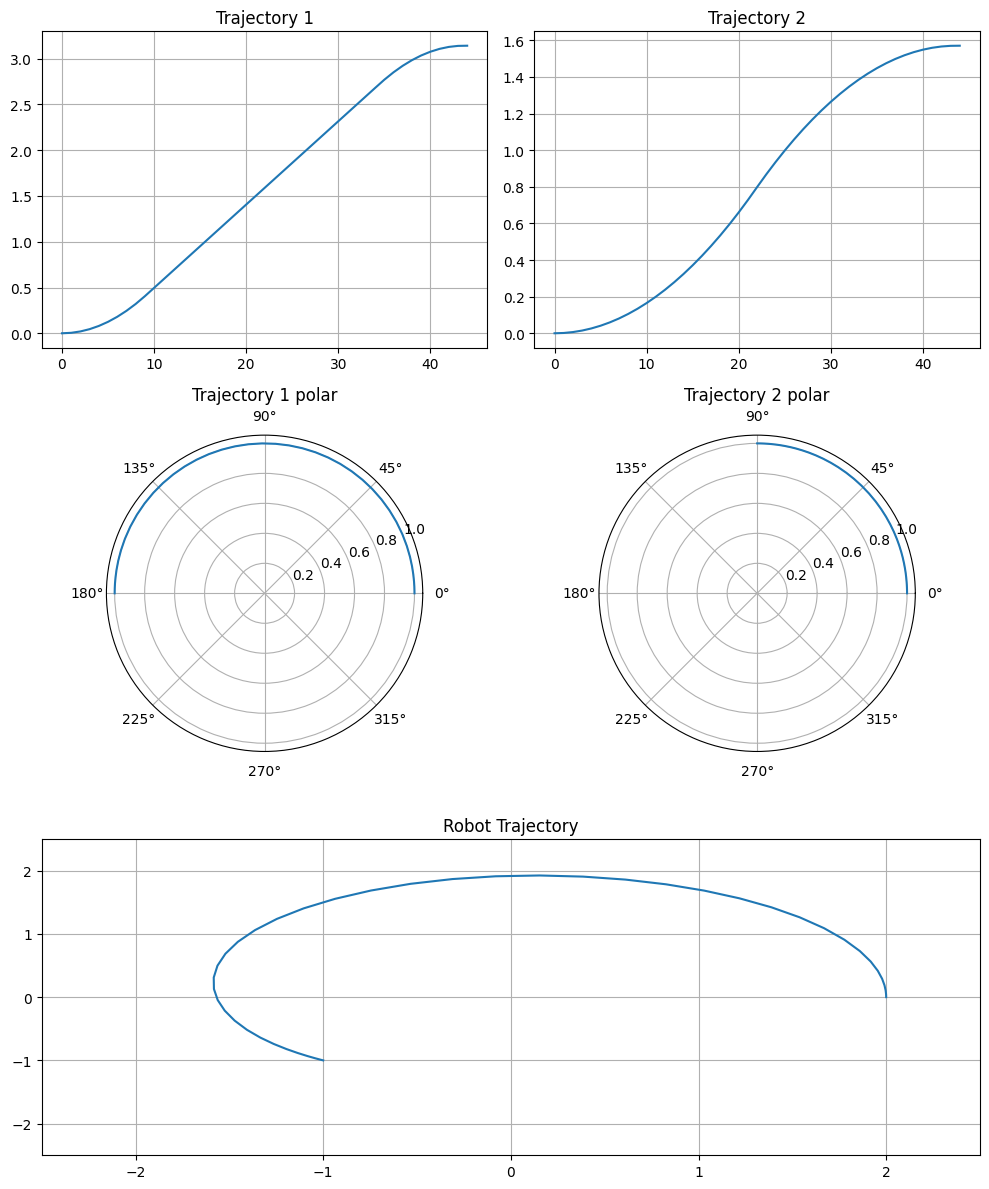

In [ ]:
trajs = traj_joint(0,0,math.pi,math.pi/2)
plot_trajs(trajs[0], trajs[1])

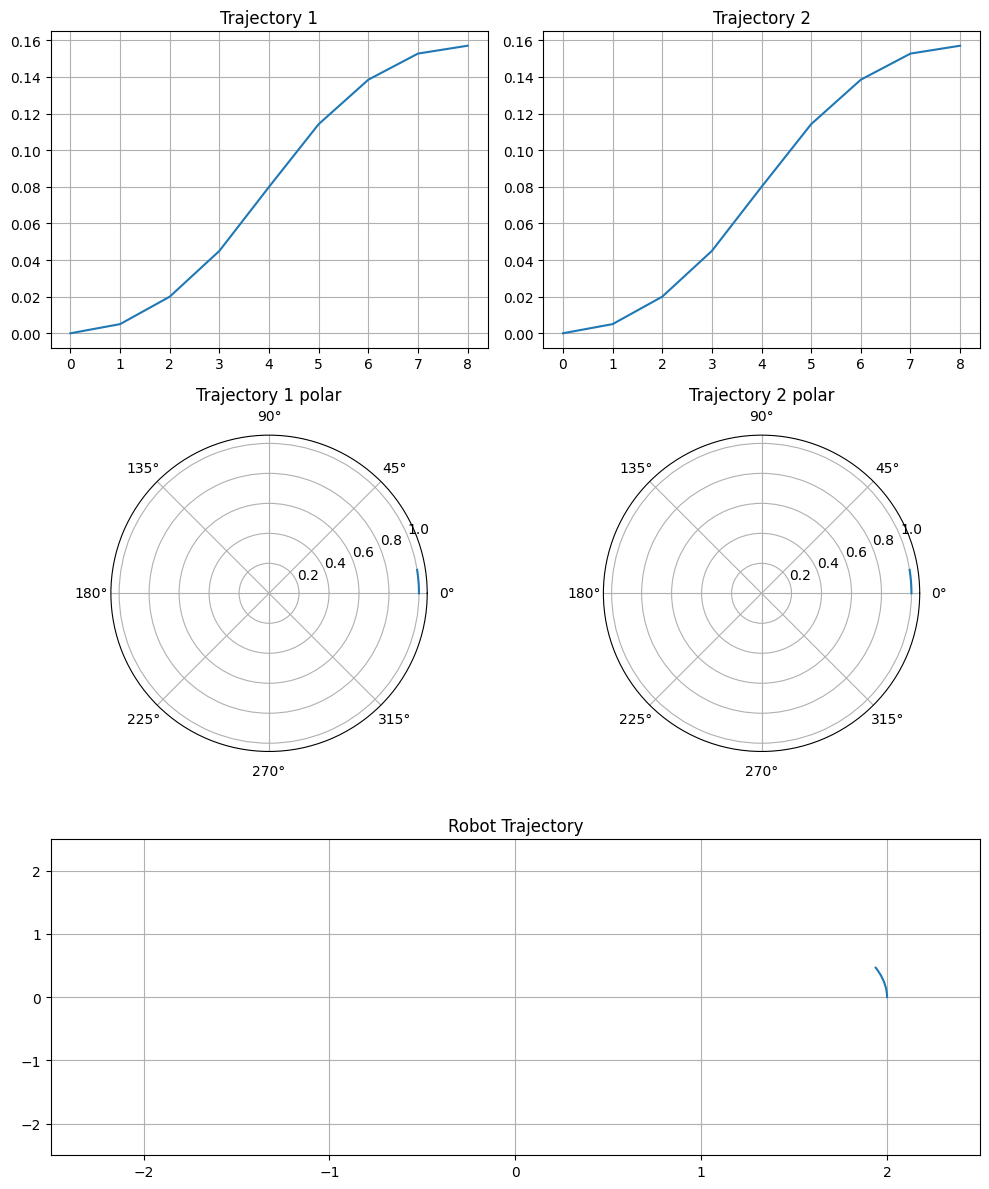

In [ ]:
trajs = traj_joint(0,0,math.pi/20,math.pi/20)
plot_trajs(trajs[0], trajs[1])

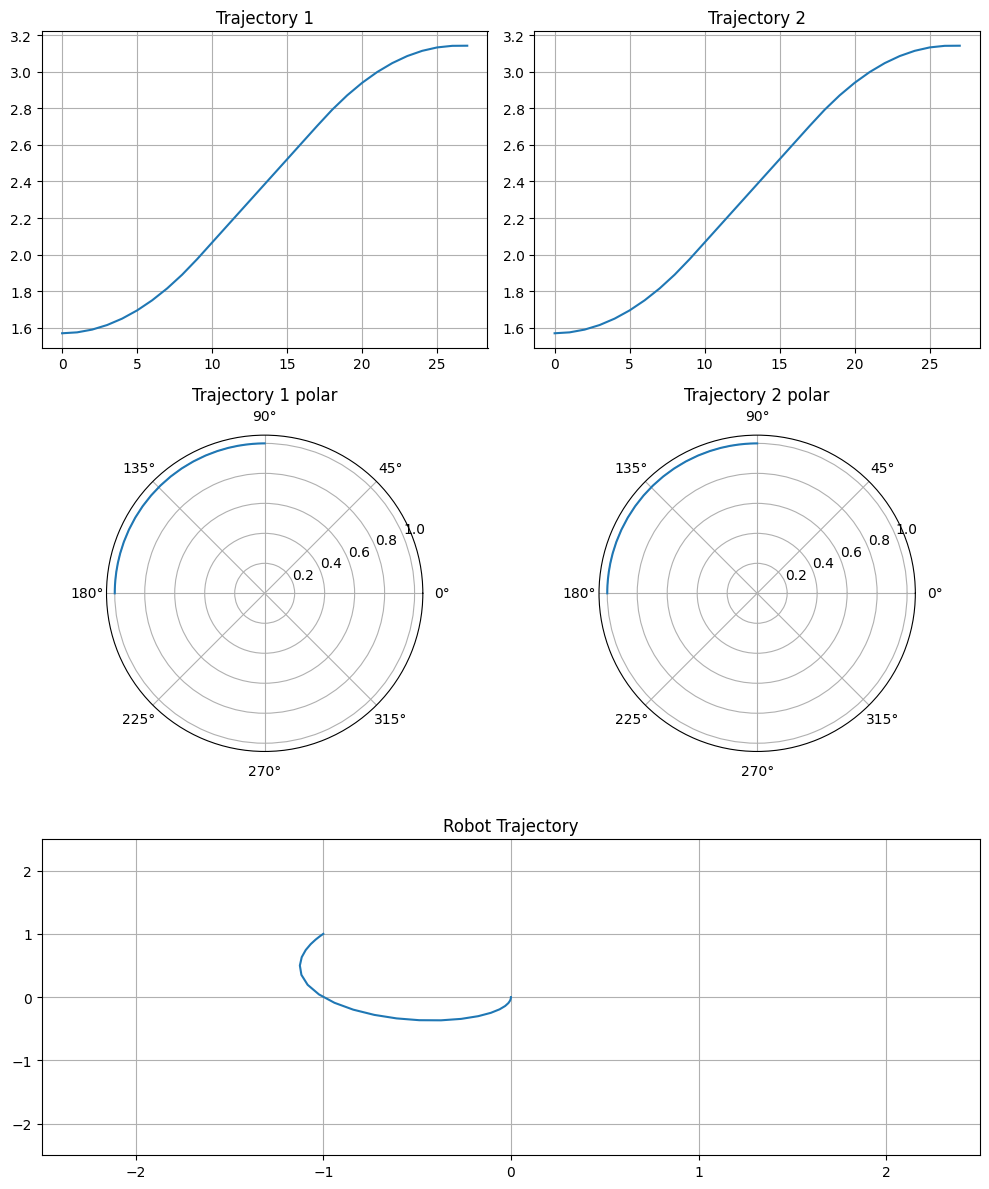

In [ ]:
trajs = traj_joint(math.pi/2,math.pi/2,math.pi,math.pi)
plot_trajs(trajs[0], trajs[1])

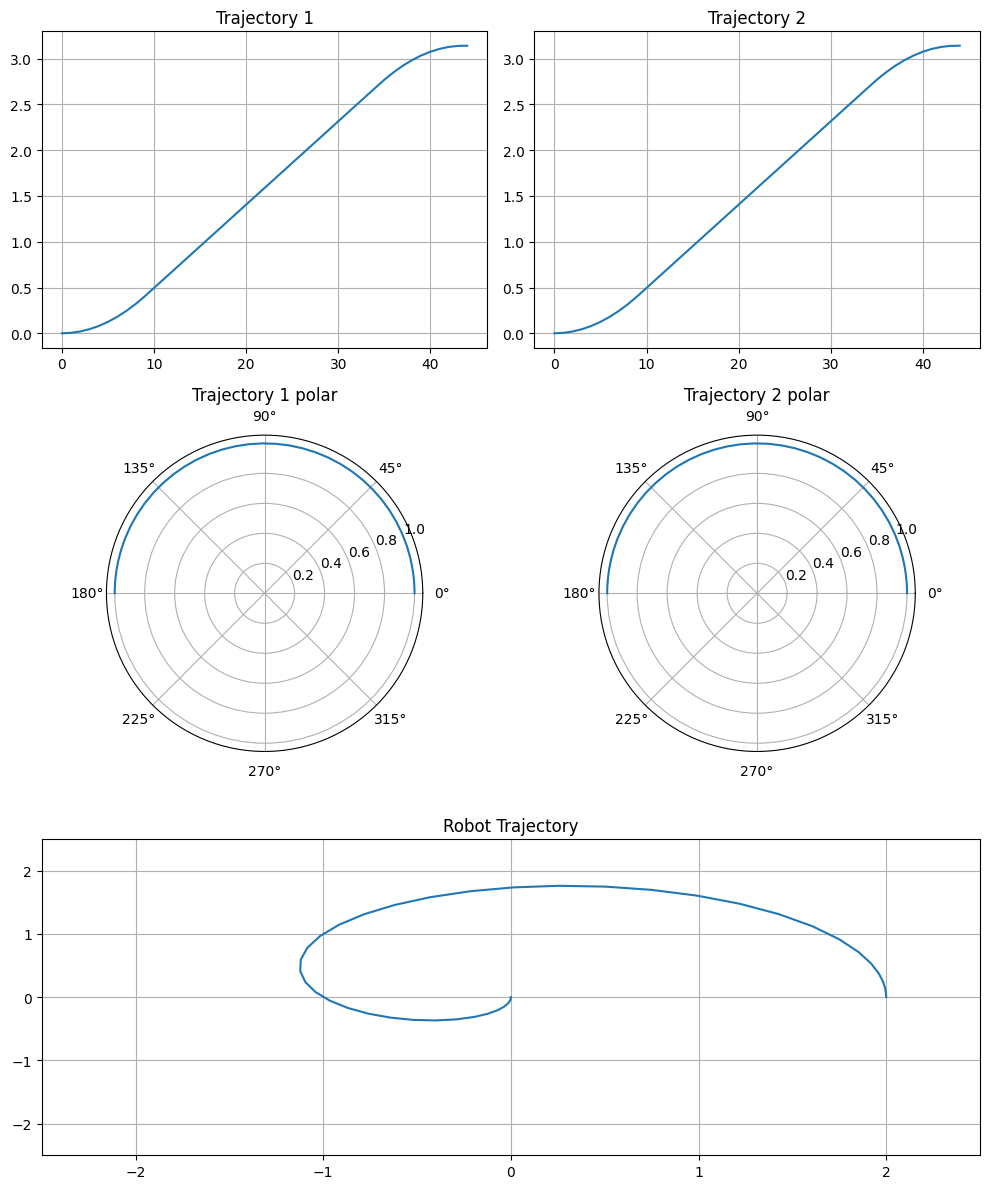

In [ ]:
trajs = traj_joint(0,0,math.pi,math.pi)
plot_trajs(trajs[0], trajs[1])

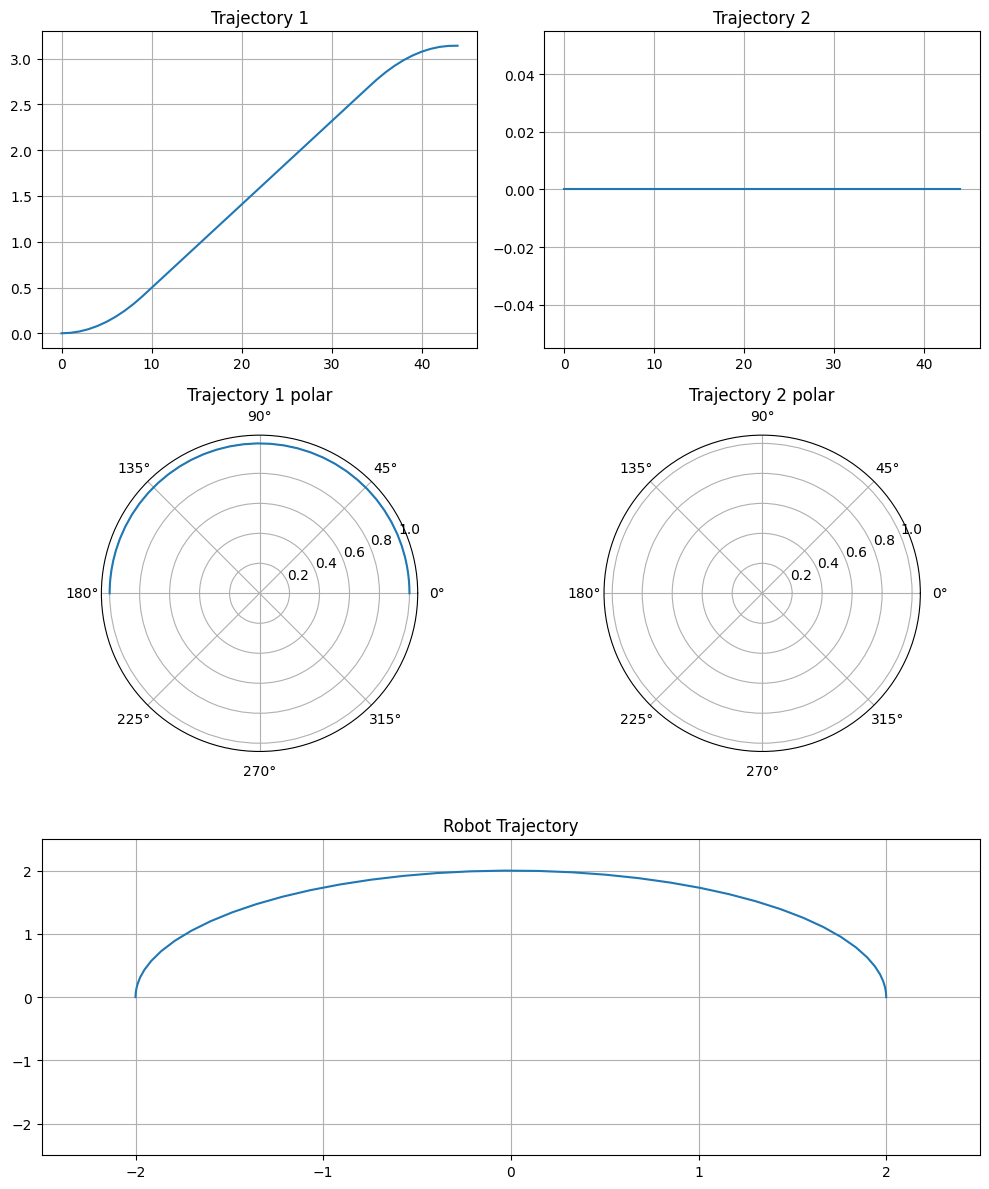

In [ ]:
trajs = traj_joint(0,0,math.pi,0)
plot_trajs(trajs[0], trajs[1])

In [ ]:
def get_eucl_traj_vector(init, final ,a,v_max,ts):
  delta = final - init

  deloc_vector = get_deloc_vector(delta, a, v_max,ts)
  traj_vector = deloc_vector + init
  return traj_vector

In [ ]:
def get_closest_theta_option(previous_position, options):
    option_1 = options[0]
    option_2 = options[1]

    #using only positive angles to check distance correctly
    ra = rectify_angle
    rectified_previous_position = (ra(previous_position[0]), ra(previous_position[1]))
    rectified_option_1 = (ra(option_1[0]), ra(option_1[1]))
    rectified_option_2 = (ra(option_2[0]), ra(option_2[1]))

    delta_theta_option_1 = abs(rectified_previous_position[0]-rectified_option_1[0]) + abs(rectified_previous_position[1]-rectified_option_1[1])
    delta_theta_option_2 = abs(rectified_previous_position[0]-rectified_option_2[0]) + abs(rectified_previous_position[1]-rectified_option_2[1])

    if delta_theta_option_1 < delta_theta_option_2:
      return option_1

    return option_2


def get_ik_from_traj(traj_1, traj_2):
  theta1_array = []
  theta2_array = []
  for i,(t1,t2) in enumerate(zip(traj_1, traj_2)):

    #ik at origin is satisfied with any theta, -pi combination
    #using the previous angle plus the delta of the last period as an approximation
    #has the caveat of assuming [0,0] is not one of the first 2 points in the array
    #additionally, no trajectories can start at [0,0] as the initial angles would be impossible to determine
    if t1==0 and t2==0:
      theta1_array.append(theta1_array[-1]+(theta1_array[-1]-theta1_array[-2])) #θ[t-1] + (θ[t-1] - θ[t-2])
      theta2_array.append(-math.pi)
      continue

    possible_thetas = ik(t1,t2)

    #get the configuration closest to the previous config
    if len(theta1_array)==0:
      closest_thetas = possible_thetas[0]
    else:
      closest_thetas = get_closest_theta_option((theta1_array[-1], theta2_array[-1]), possible_thetas)

    theta1_array.append(closest_thetas[0])
    theta2_array.append(closest_thetas[1])

  return theta1_array, theta2_array

def traj_eucl(x_init, y_init, x_final, y_final, ts = 0.1):
    a = 1.0
    v_max = 0.91

    #if one trajectory is bigger than the other, ajust the acceleration of the smallest one as to finish simultaneously
    a_1, a_2 = get_ajusted_accelerations(x_init,y_init, x_final,y_final, a, v_max, ts)
    traj_x = get_eucl_traj_vector(x_init, x_final, a_1,v_max, ts)
    traj_y = get_eucl_traj_vector(y_init, y_final, a_2,v_max, ts)

    #if one of the trajectories is null (delta=0), fill the array with the initial position
    traj_x, traj_y = make_arrays_equal_size(traj_x, traj_y)
    traj_theta1, traj_theta2 = get_ik_from_traj(traj_x, traj_y)


    return  np.array(traj_theta1), np.array(traj_theta2), traj_x, traj_y

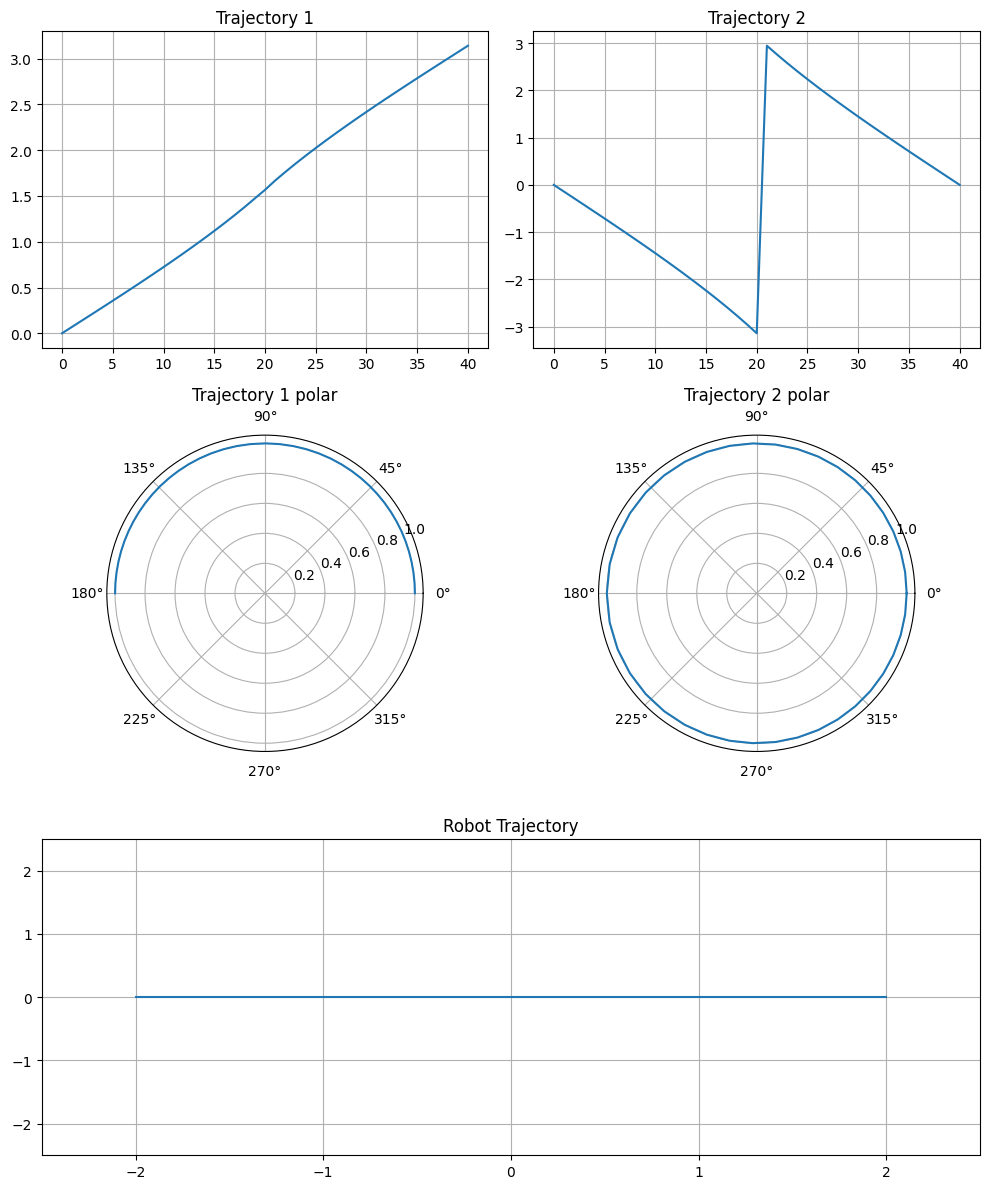

In [ ]:
trajs = traj_eucl(2,0,-2,0)
plot_trajs(trajs[0], trajs[1])

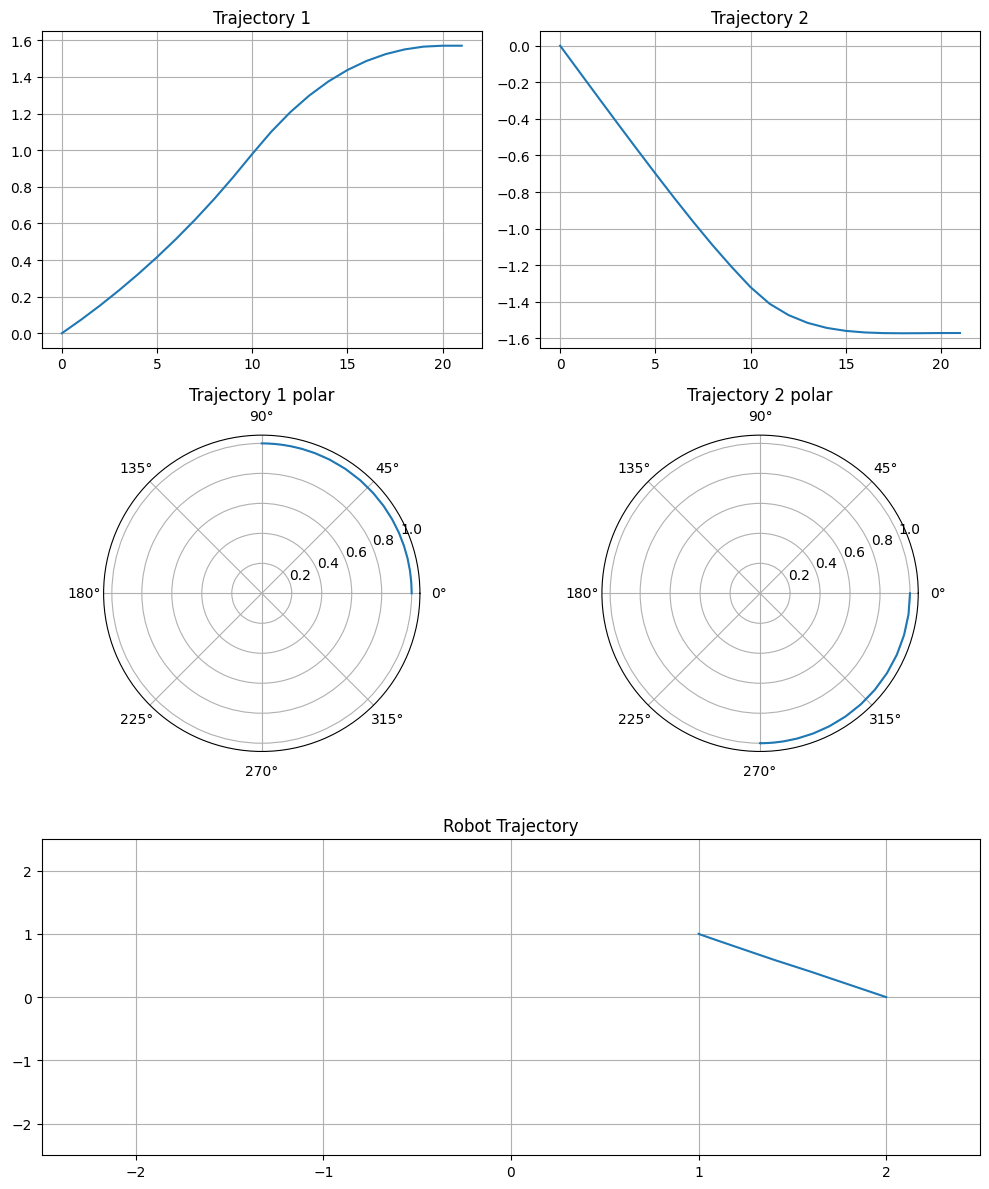

In [ ]:
trajs = traj_eucl(2,0,1,1)
plot_trajs(trajs[0], trajs[1])

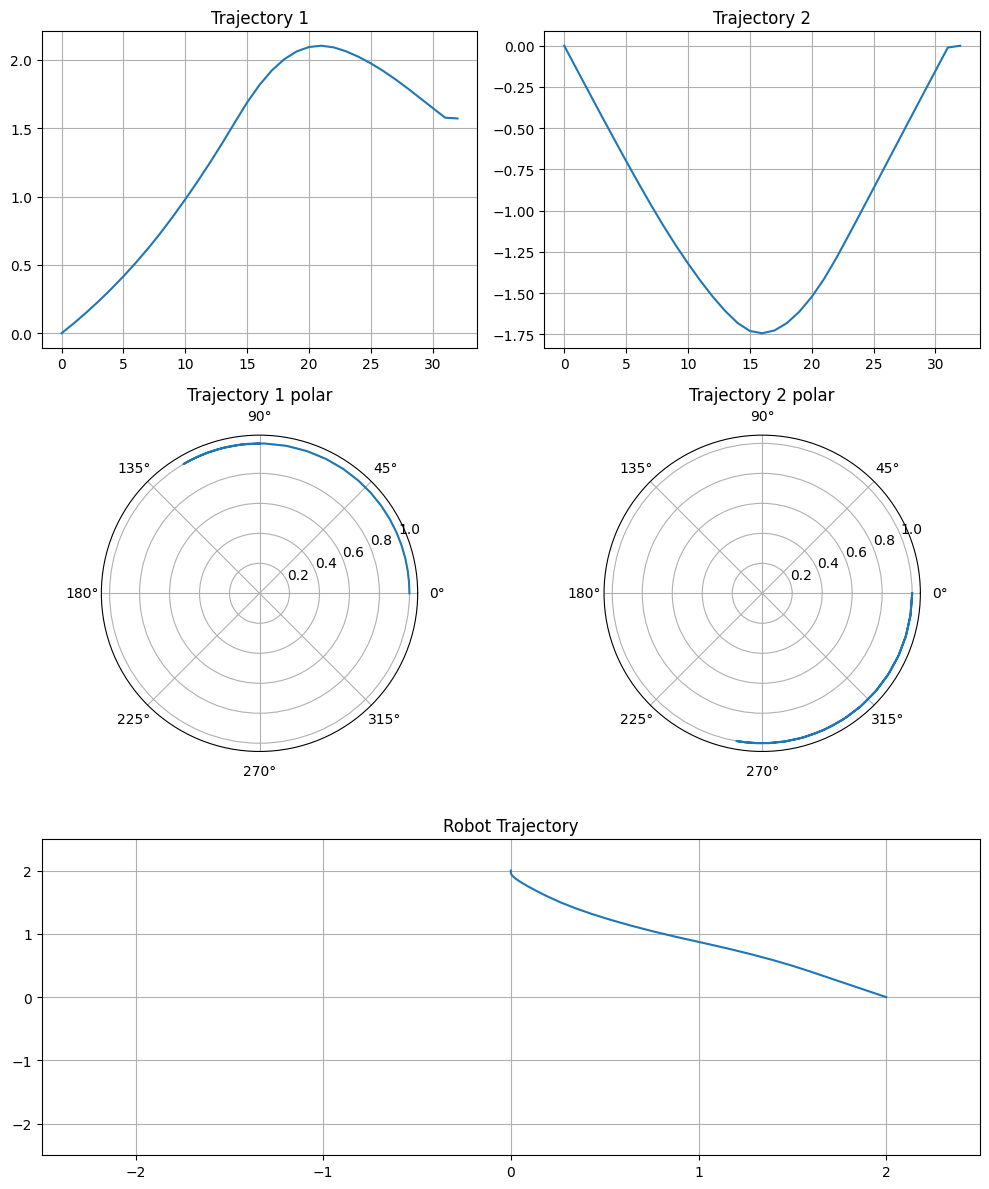

In [ ]:
trajs = traj_eucl(2,0,0,2)
plot_trajs(trajs[0], trajs[1])

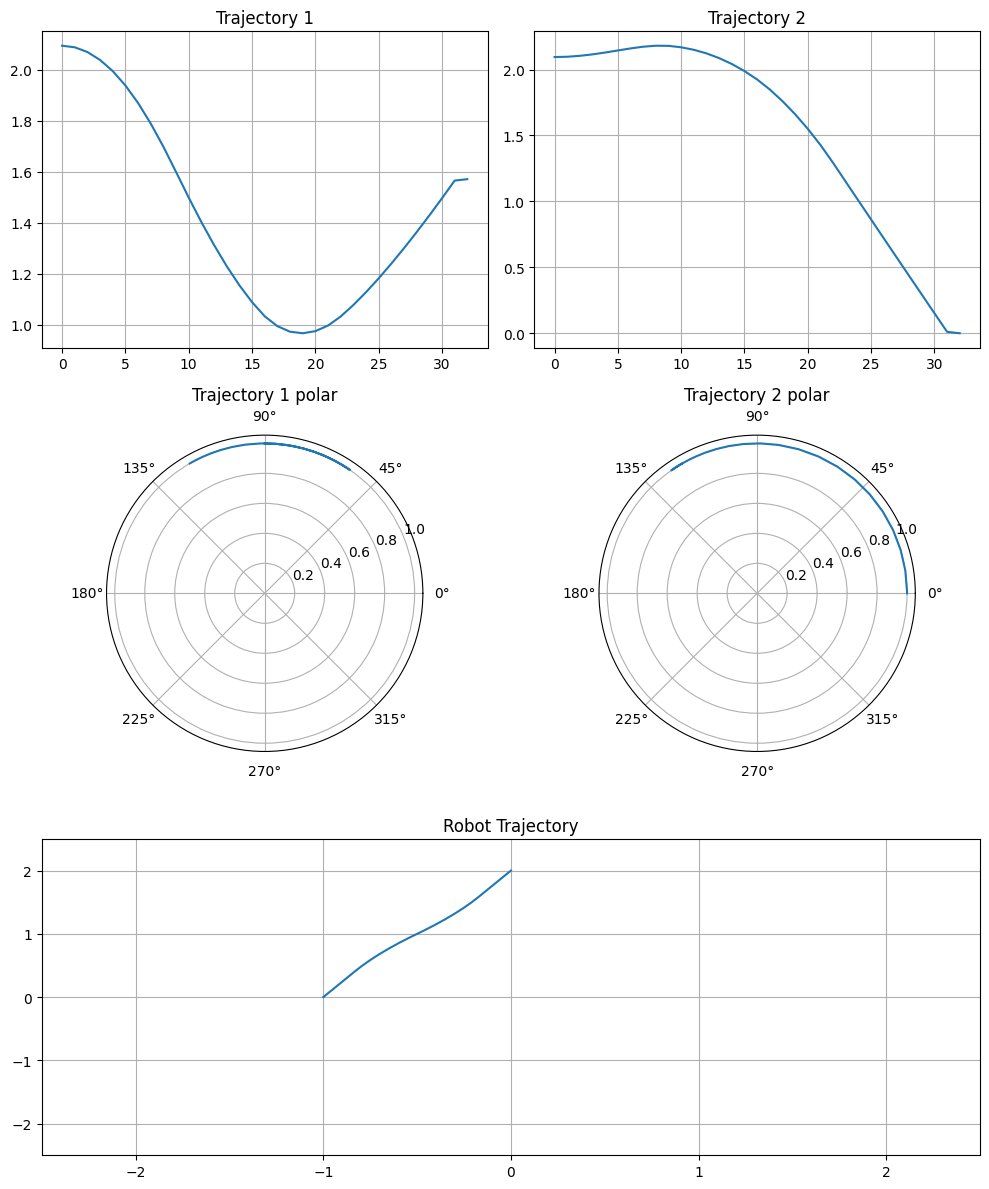

In [ ]:
trajs = traj_eucl(-1,0,0,2)
plot_trajs(trajs[0], trajs[1])